In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
net = cv2.dnn.readNet('yolov3.weights' , 'yolov3.cfg')

with open('coco.names' , 'r') as f:
    classes = f.read().splitlines()
    
img = cv2.imread('img.jpg')
height , width , _ = img.shape


blob = cv2.dnn.blobFromImage(img , 1/255,(416,416), swapRB=True,crop=False)

 
net.setInput(blob)
output_layers_names = net.getUnconnectedOutLayersNames()
output_layers = net.forward(output_layers_names)

boxes =[]
confidents=[]
class_ids=[]

for output in output_layers: 
    for detection in output: 

        score=detection[5:]
        class_id = np.argmax(score) 
        confident =score[class_id] 

        if confident > 0.5 :

            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width ) 
            h = int(detection[3] * height)

            x = int(center_x - w/2)
            y = int(center_y - h/2)


            boxes.append([x,y,w,h])
            confidents.append(float (confident))
            class_ids.append(class_id)
            
indexes = cv2.dnn.NMSBoxes(boxes ,confidents , 0.5 , 0.4) 



font = cv2.FONT_HERSHEY_PLAIN 
colors = np.random.uniform(0,255,size =(len(boxes),3)) 

for i in indexes.flatten(): 
    x,y,w,h = boxes[i]
    color = colors[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidents[i] , 2)) 
    if label =='person' :
        
        cv2.rectangle(img , (x,y), (x+w , y+h) , color , 2)
        cv2.putText(img , label + confidence , (x , y+20 ) , font , 2, color , 2)
    
        print(label + '     '+ confidence) 
    else :
        pass
    
cv2.imshow('image' , img)
cv2.waitKey(0)
cv2.destroyAllWindows()       

person     1.0
person     1.0
person     0.99
person     0.98
person     0.95


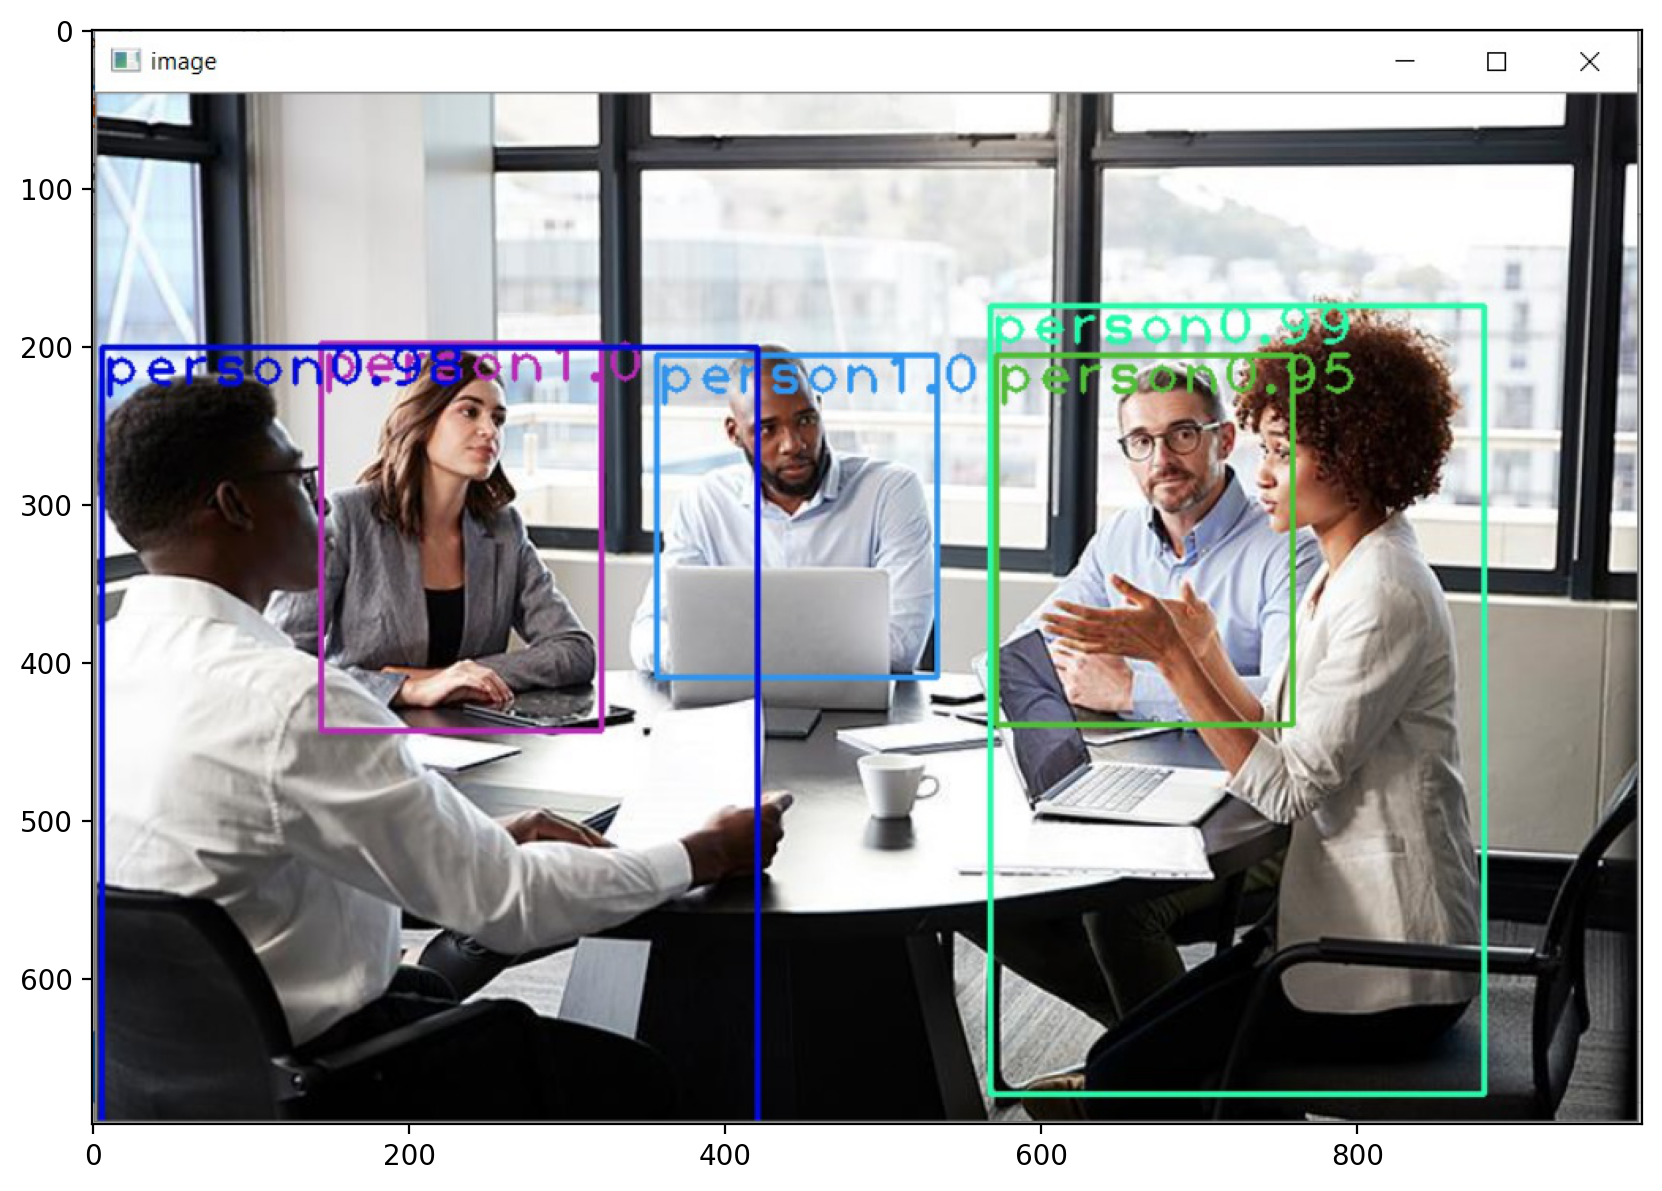

In [3]:
det_only_persons = cv2.cvtColor( cv2.imread('detection only persons.jpg') , cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8), dpi =200)
plt.imshow(det_only_persons);